In [1]:
import pandas_datareader as pdr
df=pdr.get_data_tiingo('AMZN',api_key='ae0f631f91fa6003822cdbb33a1d5ce8af02e41c')

In [2]:
df.to_csv('AMZN.csv')

In [3]:
import pandas as pd

In [4]:
df= pd.read_csv('AMZN.csv')

In [5]:
df2=df.reset_index()["close"]

In [6]:
import matplotlib.pyplot as plt
plt.plot(df2)
plt.show()

<Figure size 640x480 with 1 Axes>

In [7]:
df2

0        728.10
1        737.61
2        736.57
3        745.81
4        753.78
         ...   
1254    3443.89
1255    3448.14
1256    3440.16
1257    3432.97
1258    3510.98
Name: close, Length: 1259, dtype: float64

In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [9]:
df2.shape

(1259, 1)

In [10]:
df2

array([[0.0032108 ],
       [0.00659228],
       [0.00622249],
       ...,
       [0.96753995],
       [0.96498339],
       [0.99272147]])

In [11]:
#Splitting the data into train and test has to done serially as this is time
# series data and 
# which means if we have 100 data set then if want 70 percent data in
# training and 30 percent in testing then 1- 70 will for training and 71-100 
# form testing
training_size=int(len(df2)*.7)
test_size=len(df2) - training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [12]:
training_size,test_size

(881, 378)

In [13]:
import tensorflow as tf
tf.__version__

'2.5.0'

Data PREPROCESSING
IN THIS DEPEDENT VARAIBLES ARE CREATED OUT OF TIMES SERIES DATA
Eg.  WE HAVE A SERIES OF DATA 145,123,234,345,3546,234,536,432,435,456
NOW WE CHOOSE TIME STEP OF 5, THEN FIRST FIVE DATA POINTS ARE DEPDENDENT 
VARIABLE AND 6TH DATA IS INDEPENDENT VARAIBLE. FOR NEXT DATA WE SHIFT 1 STEP
AND 2 TO 6 IS DEPENDENT VAIRABLE AND  7 IS INDEPDENT VARIABLE.
THIS IS MAINLY BECAUSE THE PRICE OF 6TH DAY IS DEPENDENT ON LAST 5 DAY
F1   F1   F3  F4   F5    O/P
145  123 234  345  3546  234

SIMILARY WE CAN CHOOSE ANY TIME STEP TO CREATE DEPENDENT AND INDEPENDENT 
VARIABLE


In [14]:
import numpy 
def create_data(dataset,timestep):
    datax, datay=[],[]
    for i in range(len(dataset)-timestep-1):
        a=dataset[i:(i+timestep),0]
        
        datax.append(a)
        datay.append(dataset[i+timestep,0])
    return numpy.array(datax),numpy.array(datay)

In [15]:
time_step=100
x_train,y_train=create_data(train_data,time_step)
x_test,y_test =create_data(test_data,time_step)

In [16]:
print(x_train)

[[0.0032108  0.00659228 0.00622249 ... 0.0146104  0.02166492 0.02356012]
 [0.00659228 0.00622249 0.00950796 ... 0.02166492 0.02356012 0.02170759]
 [0.00622249 0.00950796 0.01234186 ... 0.02356012 0.02170759 0.02179649]
 ...
 [0.38001977 0.3820003  0.39604179 ... 0.38185807 0.38051046 0.40879966]
 [0.3820003  0.39604179 0.38704229 ... 0.38051046 0.40879966 0.4091659 ]
 [0.39604179 0.38704229 0.37898506 ... 0.40879966 0.4091659  0.40101978]]


In [17]:
numpy.__version__

'1.19.5'

In [18]:
print(x_test.shape),print(y_test.shape)

(277, 100)
(277,)


(None, None)

In [19]:
#CONVERTING the 2 data into 3d data by adding 1 in 3rd dimension to suit tensor
#flow model
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [20]:
x_train.shape

(780, 100, 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
13/13 [==============================] - 6s 180ms/step - loss: 0.0234 - val_loss: 0.1507
Epoch 2/100
13/13 [==============================] - 1s 108ms/step - loss: 0.0053 - val_loss: 0.0251
Epoch 3/100
13/13 [==============================] - 1s 111ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 4/100
13/13 [==============================] - 1s 107ms/step - loss: 7.5675e-04 - val_loss: 0.0024
Epoch 5/100
13/13 [==============================] - 1s 108ms/step - loss: 7.4057e-04 - val_loss: 0.0048
Epoch 6/100
13/13 [==============================] - 1s 108ms/step - loss: 6.3233e-04 - val_loss: 0.0067
Epoch 7/100
13/13 [==============================] - 1s 107ms/step - loss: 6.1392e-04 - val_loss: 0.0060
Epoch 8/100
13/13 [==============================] - 1s 107ms/step - loss: 6.0450e-04 - val_loss: 0.0096
Epoch 9/100
13/13 [==============================] - 1s 109ms/step - loss: 5.9862e-04 - val_loss: 0.0145
Epoch 10/100
13/13 [==============================] - 1s 109ms/step

13/13 [==============================] - 1s 108ms/step - loss: 3.2566e-04 - val_loss: 0.0183
Epoch 79/100
13/13 [==============================] - 1s 114ms/step - loss: 3.5951e-04 - val_loss: 0.0099
Epoch 80/100
13/13 [==============================] - 1s 110ms/step - loss: 3.1329e-04 - val_loss: 0.0127
Epoch 81/100
13/13 [==============================] - 2s 118ms/step - loss: 2.9444e-04 - val_loss: 0.0137
Epoch 82/100
13/13 [==============================] - 2s 118ms/step - loss: 2.8671e-04 - val_loss: 0.0178
Epoch 83/100
13/13 [==============================] - 1s 105ms/step - loss: 3.0566e-04 - val_loss: 0.0113
Epoch 84/100
13/13 [==============================] - 1s 108ms/step - loss: 2.9674e-04 - val_loss: 0.0146
Epoch 85/100
13/13 [==============================] - 1s 111ms/step - loss: 2.9845e-04 - val_loss: 0.0085
Epoch 86/100
13/13 [==============================] - 1s 108ms/step - loss: 2.9590e-04 - val_loss: 0.0162
Epoch 87/100
13/13 [==============================] - 2s 11

In [25]:
#LSTM is now trained and we will predict the train and test data
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [26]:
# transform  back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1479.3715409483082

In [28]:
math.sqrt(mean_squared_error(y_test,test_predict))

2872.2241181356926

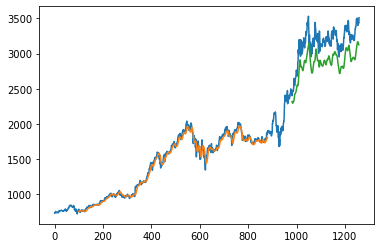

In [29]:
look_back=100
trainPredictPlot=np.empty_like(df2)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

#shift test  predictions for plotting
testPredictPlot=np.empty_like(df2)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1,:] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [30]:
test_data.shape



(378, 1)

In [31]:
x_input=test_data[278:].reshape(1,-1)  # taking only lasat 100 data only from t
                                       # test data

In [32]:
x_input.shape

(1, 100)

In [33]:
print(x_input)

[[0.9129314  0.90423769 0.90977748 0.90666268 0.92077529 0.92774092
  0.89988906 0.87529779 0.88019044 0.86775614 0.83135636 0.84407512
  0.86299504 0.84464404 0.81280979 0.80305649 0.8111955  0.79394676
  0.83337956 0.83152703 0.85142122 0.84285196 0.84007495 0.84369466
  0.85929355 0.82098436 0.83768552 0.85045406 0.85992291 0.84199148
  0.82748064 0.82953228 0.83795931 0.83069144 0.84448403 0.86827882
  0.89165049 0.89061578 0.91037484 0.91745426 0.94337536 0.94593192
  0.95326023 0.92943699 0.94582524 0.95306111 0.9433078  0.9300379
  0.93975565 0.92091751 0.93223889 0.95646036 0.95945783 0.97406112
  0.97861598 0.97723281 0.94845647 0.92192378 0.90722804 0.91996814
  0.91471992 0.87876461 0.89064778 0.86505735 0.86844594 0.89028865
  0.90717471 0.89362391 0.89345323 0.89909969 0.88324124 0.89814321
  0.90314253 0.90531507 0.89285232 0.8903491  0.88877748 0.89423193
  0.87752722 0.88435773 0.8814385  0.90494172 0.91100065 0.93535724
  0.93435453 0.94752487 0.94726175 0.95868268 0.9

In [34]:
# converting the x_input into list
temp_input=list(x_input)
print(temp_input)

[array([0.9129314 , 0.90423769, 0.90977748, 0.90666268, 0.92077529,
       0.92774092, 0.89988906, 0.87529779, 0.88019044, 0.86775614,
       0.83135636, 0.84407512, 0.86299504, 0.84464404, 0.81280979,
       0.80305649, 0.8111955 , 0.79394676, 0.83337956, 0.83152703,
       0.85142122, 0.84285196, 0.84007495, 0.84369466, 0.85929355,
       0.82098436, 0.83768552, 0.85045406, 0.85992291, 0.84199148,
       0.82748064, 0.82953228, 0.83795931, 0.83069144, 0.84448403,
       0.86827882, 0.89165049, 0.89061578, 0.91037484, 0.91745426,
       0.94337536, 0.94593192, 0.95326023, 0.92943699, 0.94582524,
       0.95306111, 0.9433078 , 0.9300379 , 0.93975565, 0.92091751,
       0.93223889, 0.95646036, 0.95945783, 0.97406112, 0.97861598,
       0.97723281, 0.94845647, 0.92192378, 0.90722804, 0.91996814,
       0.91471992, 0.87876461, 0.89064778, 0.86505735, 0.86844594,
       0.89028865, 0.90717471, 0.89362391, 0.89345323, 0.89909969,
       0.88324124, 0.89814321, 0.90314253, 0.90531507, 0.8928

In [35]:
temp_input=temp_input[0].tolist()

In [36]:
print(temp_input)

[0.9129313961840151, 0.9042376919192998, 0.9097774838393107, 0.9066626842745291, 0.9207752864122203, 0.92774091694579, 0.8998890619333093, 0.8752977904835051, 0.8801904436811527, 0.8677561353728873, 0.8313563600935863, 0.8440751249831104, 0.8629950433440716, 0.8446440381456277, 0.812809790995527, 0.8030564859656237, 0.8111954998968847, 0.7939467639508175, 0.833379557527788, 0.8315270340423415, 0.8514212161941135, 0.8428519616836987, 0.8400749543091617, 0.8436946643056773, 0.8592935520804446, 0.8209843619994455, 0.8376855190265897, 0.8504540638178342, 0.8599229122664791, 0.8419914805253916, 0.8274806391739384, 0.8295322822662659, 0.837959308486051, 0.8306914428348944, 0.8444840313186697, 0.8682788243409498, 0.8916504881986078, 0.8906157773842798, 0.9103748426599536, 0.9174542558260266, 0.9433753617932144, 0.9459319153172758, 0.95326022799195, 0.9294369893115442, 0.945825244099304, 0.9530611083850691, 0.9433078033551656, 0.9300379038394528, 0.939755651796699, 0.9209175147028497, 0.932238

In [37]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        print(x_input.shape)
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        print(x_input.shape)
        
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
        

(1, 100, 1)
[0.85469323]
1 day input [0.90423769 0.90977748 0.90666268 0.92077529 0.92774092 0.89988906
 0.87529779 0.88019044 0.86775614 0.83135636 0.84407512 0.86299504
 0.84464404 0.81280979 0.80305649 0.8111955  0.79394676 0.83337956
 0.83152703 0.85142122 0.84285196 0.84007495 0.84369466 0.85929355
 0.82098436 0.83768552 0.85045406 0.85992291 0.84199148 0.82748064
 0.82953228 0.83795931 0.83069144 0.84448403 0.86827882 0.89165049
 0.89061578 0.91037484 0.91745426 0.94337536 0.94593192 0.95326023
 0.92943699 0.94582524 0.95306111 0.9433078  0.9300379  0.93975565
 0.92091751 0.93223889 0.95646036 0.95945783 0.97406112 0.97861598
 0.97723281 0.94845647 0.92192378 0.90722804 0.91996814 0.91471992
 0.87876461 0.89064778 0.86505735 0.86844594 0.89028865 0.90717471
 0.89362391 0.89345323 0.89909969 0.88324124 0.89814321 0.90314253
 0.90531507 0.89285232 0.8903491  0.88877748 0.89423193 0.87752722
 0.88435773 0.8814385  0.90494172 0.91100065 0.93535724 0.93435453
 0.94752487 0.94726175 0.

8 day output [[0.6344619]]
9 day input [0.86775614 0.83135636 0.84407512 0.86299504 0.84464404 0.81280979
 0.80305649 0.8111955  0.79394676 0.83337956 0.83152703 0.85142122
 0.84285196 0.84007495 0.84369466 0.85929355 0.82098436 0.83768552
 0.85045406 0.85992291 0.84199148 0.82748064 0.82953228 0.83795931
 0.83069144 0.84448403 0.86827882 0.89165049 0.89061578 0.91037484
 0.91745426 0.94337536 0.94593192 0.95326023 0.92943699 0.94582524
 0.95306111 0.9433078  0.9300379  0.93975565 0.92091751 0.93223889
 0.95646036 0.95945783 0.97406112 0.97861598 0.97723281 0.94845647
 0.92192378 0.90722804 0.91996814 0.91471992 0.87876461 0.89064778
 0.86505735 0.86844594 0.89028865 0.90717471 0.89362391 0.89345323
 0.89909969 0.88324124 0.89814321 0.90314253 0.90531507 0.89285232
 0.8903491  0.88877748 0.89423193 0.87752722 0.88435773 0.8814385
 0.90494172 0.91100065 0.93535724 0.93435453 0.94752487 0.94726175
 0.95868268 0.98499136 0.98415932 0.97244682 0.99075161 0.99017558
 0.97071164 0.95377936 0

17 day output [[0.37979746]]
18 day input [0.83337956 0.83152703 0.85142122 0.84285196 0.84007495 0.84369466
 0.85929355 0.82098436 0.83768552 0.85045406 0.85992291 0.84199148
 0.82748064 0.82953228 0.83795931 0.83069144 0.84448403 0.86827882
 0.89165049 0.89061578 0.91037484 0.91745426 0.94337536 0.94593192
 0.95326023 0.92943699 0.94582524 0.95306111 0.9433078  0.9300379
 0.93975565 0.92091751 0.93223889 0.95646036 0.95945783 0.97406112
 0.97861598 0.97723281 0.94845647 0.92192378 0.90722804 0.91996814
 0.91471992 0.87876461 0.89064778 0.86505735 0.86844594 0.89028865
 0.90717471 0.89362391 0.89345323 0.89909969 0.88324124 0.89814321
 0.90314253 0.90531507 0.89285232 0.8903491  0.88877748 0.89423193
 0.87752722 0.88435773 0.8814385  0.90494172 0.91100065 0.93535724
 0.93435453 0.94752487 0.94726175 0.95868268 0.98499136 0.98415932
 0.97244682 0.99075161 0.99017558 0.97071164 0.95377936 0.96886623
 0.9703774  0.96753995 0.96498339 0.99272147 0.85469323 0.84222579
 0.81973886 0.7915144

29 day output [[0.27325413]]


In [38]:
import numpy as np
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
import matplotlib.pyplot as plt
len(df2)

1259

In [40]:
df3=df2.tolist()
df3.extend(lst_output)

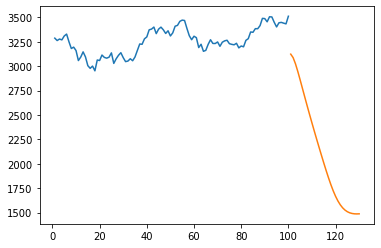

In [42]:
plt.plot(day_new,scaler.inverse_transform(df2[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))